# Plot AFAPE results (convergence plot) 
Plot the results for one agent, but as a function of the number of datapoints (convergence plot) 

In [1]:
%load_ext autoreload
%autoreload 2

## Define paths

In [36]:
# which dataset to work on 
dataset_name   = "synthetic_4"

# name for of missingness scenario 
miss_scenario  = 'MCAR_1'

# name for agent 
agent_name  = 'DQN'
# name for agents
agent_index = 0
agent_names  = ['Random 0% with TCN', 'Random 10% with TCN', 'Random 50% with TCN', 'Random 100% with TCN']
agent_names_display = ['random_zero_acquisition', 'random_ten_acquisition', 'random_fifty_acquisition', 'random_hundred_acquisition']
agent_name = agent_names[agent_index]
agent_name_display = agent_names_display[agent_index]

included_estimator_types =  ['blocking', 'ground_truth', 'gaussian_process']

In [19]:
# other specifications 
data_dir       = "../../../data/ts/" + dataset_name + "/" + miss_scenario + "/" 
agent_dir = data_dir + 'afa_agents' + '/' + agent_name + '/'

# find all bootstrap results files
agent_bootstrap_files = {}
for included_estimator_type in included_estimator_types:
    agent_bootstrap_files[included_estimator_type] = agent_dir + included_estimator_type + '_' + 'J_bootstraps_convergence.hkl'

## Write a Report

In [4]:
from afa.afa_models.afa_estimators.afa_convergence_report import AFAConvergenceReport

Ground truth E[C|do(R_bar = 1)] = 4.710949836527024


/home2/joshua.wendland/Documents/afa_ts/afa_env/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
/home2/joshua.wendland/Documents/afa_ts/afa_env/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1583: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,
/home2/joshua.wendland/Documents/afa_ts/afa/afa_models/afa_estimators/visualization/plot_convergence_results.py:96: RuntimeWarning: All-NaN slice encountered
  error_max = np.maximum(error_max , np.nanmax(error_median))
/home2/joshua.wendland/Documents/afa_ts/afa/afa_models/afa_estimators/visualization/plot_convergence_results.py:97: RuntimeWarning: All-NaN slice encountered
  


[Errno 2] No such file or directory: 'pandoc'
Error, but instead of markdown format, saving the latex format into the file "../../../data/ts/synthetic_4/MCAR_1/afa_agents/Random 50% with TCN/afape_convergence_report.md" . 
Content of file:

\usepackage{longtable}\section{AFAPE convergence}
\paragraph{Agent Random 50% with TCN and missingness scenario MCAR_1}
\begin{figure}\centering\includegraphics[width=0.5 \textwidth]{img/afape_convergence_report.afape_convergence_results.png}\caption{AFAPE convergence}\label{fig:img/afape_convergence_report.afape_convergence_results.png}\end{figure}


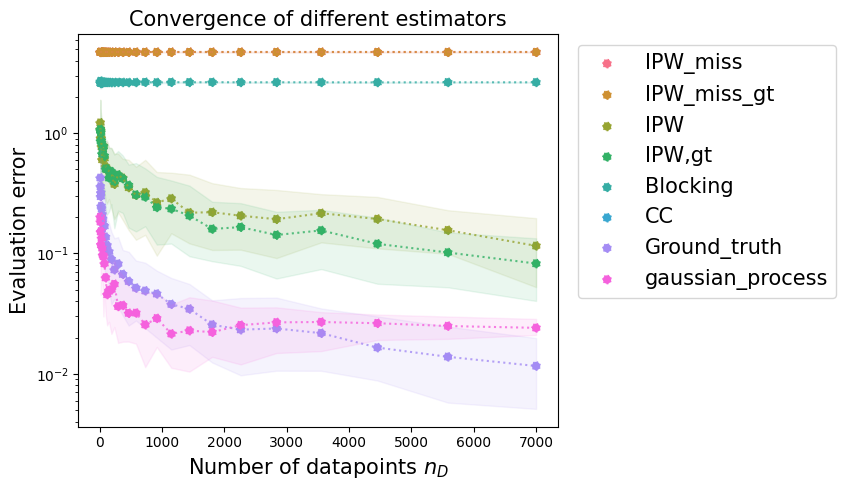

In [25]:
afa_convergence_report = AFAConvergenceReport(  agent_bootstrap_files = agent_bootstrap_files, 
                                                agent_name                 = agent_name, 
                                                dataset_name               = dataset_name, 
                                                miss_scenario              = miss_scenario) 

explanation_file = agent_dir  + 'afape_convergence_report.md'  # +  'reports/' + 'model_report' 
afa_convergence_report.explain(file= explanation_file, format = 'markdown')

In [43]:
from afa.afa_models.afa_estimators.visualization.plot_convergence_results import plot_convergence_results

# which dataset to work on 
dataset_name   = "synthetic_4"
# name for of missingness scenario 
miss_scenario  = 'MCAR_1'
# name for agents
agent_index = 4
agent_names  = ['Random 0% with TCN', 'Random 10% with TCN', 'Random 50% with TCN', 'Random 100% with TCN']
agent_names_display = ['random_zero_acquisition', 'random_ten_acquisition', 'random_fifty_acquisition', 'random_hundred_acquisition']
agent_name = agent_names[agent_index]
agent_name_display = agent_names_display[agent_index]
included_estimator_types =  ['blocking', 'ground_truth', 'gaussian_process']

# other specifications 
data_dir       = "../../../data/ts/" + dataset_name + "/" + miss_scenario + "/" 
agent_dir = data_dir + 'afa_agents' + '/' + agent_name + '/'
# find all bootstrap results files
agent_bootstrap_files = {}
for included_estimator_type in included_estimator_types:
    agent_bootstrap_files[included_estimator_type] = agent_dir + included_estimator_type + '_' + 'J_bootstraps_convergence.hkl'
    
afa_convergence_report = AFAConvergenceReport(  agent_bootstrap_files = agent_bootstrap_files, 
                                                agent_name                 = agent_name, 
                                                dataset_name               = dataset_name, 
                                                miss_scenario              = miss_scenario) 

J_estimator_types = ['Blocking', 'Ground_truth', 'gaussian_process']
J_bootstraps = {k: afa_convergence_report.J_bootstraps[k] for k in J_estimator_types if k in afa_convergence_report.J_bootstraps}
# afa_convergence_report.J_bootstraps.keys()
J_gt = J_bootstraps['Ground_truth'][-1,:].mean() 
fig = plot_convergence_results(J_bootstraps, afa_convergence_report.convergence_steps, J_gt, legend=False, title='Agent: ' + agent_name, figsize=(5,5))
fig.savefig(f'/home2/joshua.wendland/Documents/sepsis/figures/AFAPE_synthetic_4/convergence_plot_{agent_name_display}.pdf', bbox_inches='tight')


IndexError: list index out of range